In [1]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

# Library for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [50]:
# Importing Dataset
df = pd.read_csv(r"C:\Users\Himanshu Kotkar\Desktop\Raw_HR-Employee-Attrition.csv")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">UNDERSTANDING & CLEANING DATA </h2>
</div>

In [3]:
# Top 5 rows
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [4]:
# Metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

### <font color=red>Inference:</font>

1. In total there are 35 columns and 1470 rows.
2. In which there are 18 Numerical Attributes in the dataset.
3. And the remaining 17 are Categorical Attributes.

In [5]:
# Let's take a look at the numerical features
df.select_dtypes(np.number).head(5)

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,3468,16632,9,12,80,1,6,3,2,2,2,2


In [6]:
# Let's take a look at the categorical features
df.select_dtypes(include='O').head(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior Level,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Junior Level,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Entry Level,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Entry Level,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Entry Level,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better


In [7]:
# Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Descriptive Analysis of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [9]:
# Descriptive Analysis of categorical attributes
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


### <font color=green>Inference:</font>

1. The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
2. The Stanard Deviation value of EmployeeCount and StandardHours is 0.00 which conveys that All values present in this attribute are same.
3. Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
4. Since this Attribute will not provide any meaningful insights in our analysis we can simply drop these attributes.

In [10]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [11]:
# Checking for Duplicate Values
df.duplicated().sum()

0

In [12]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [13]:
# Target Variable
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

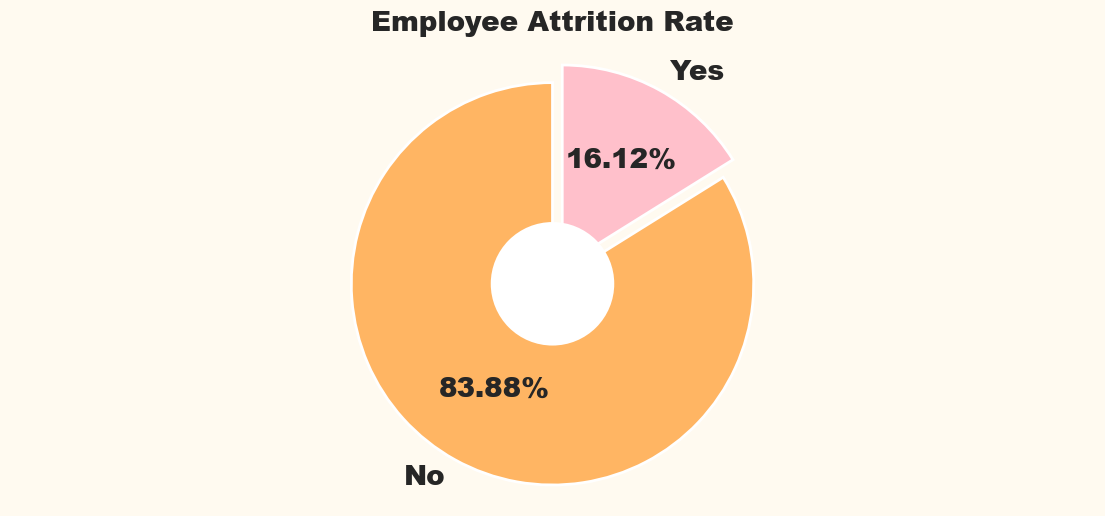

In [14]:
plt.figure(figsize=(14,6))
plt.pie(df['Attrition'].value_counts(), labels=["No","Yes"], autopct="%.2f%%",textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])
center_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.axis('equal')
plt.show()

### <font color=green>Inference:</font>

    1. The employee attrition rate of this organization is 16.12%.
    2. According online resources and domain experts, it says that the attrition rate 4% to 6% is normal in organization.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA ANALYSIS</h2>
</div>


1. The heatmap below represents the correlation matrix of the dataset.
2. Correlation measures the strength and direction of the linear relationship between variables.
3. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. 
4. Values close to 0 suggest little to no linear relationship.


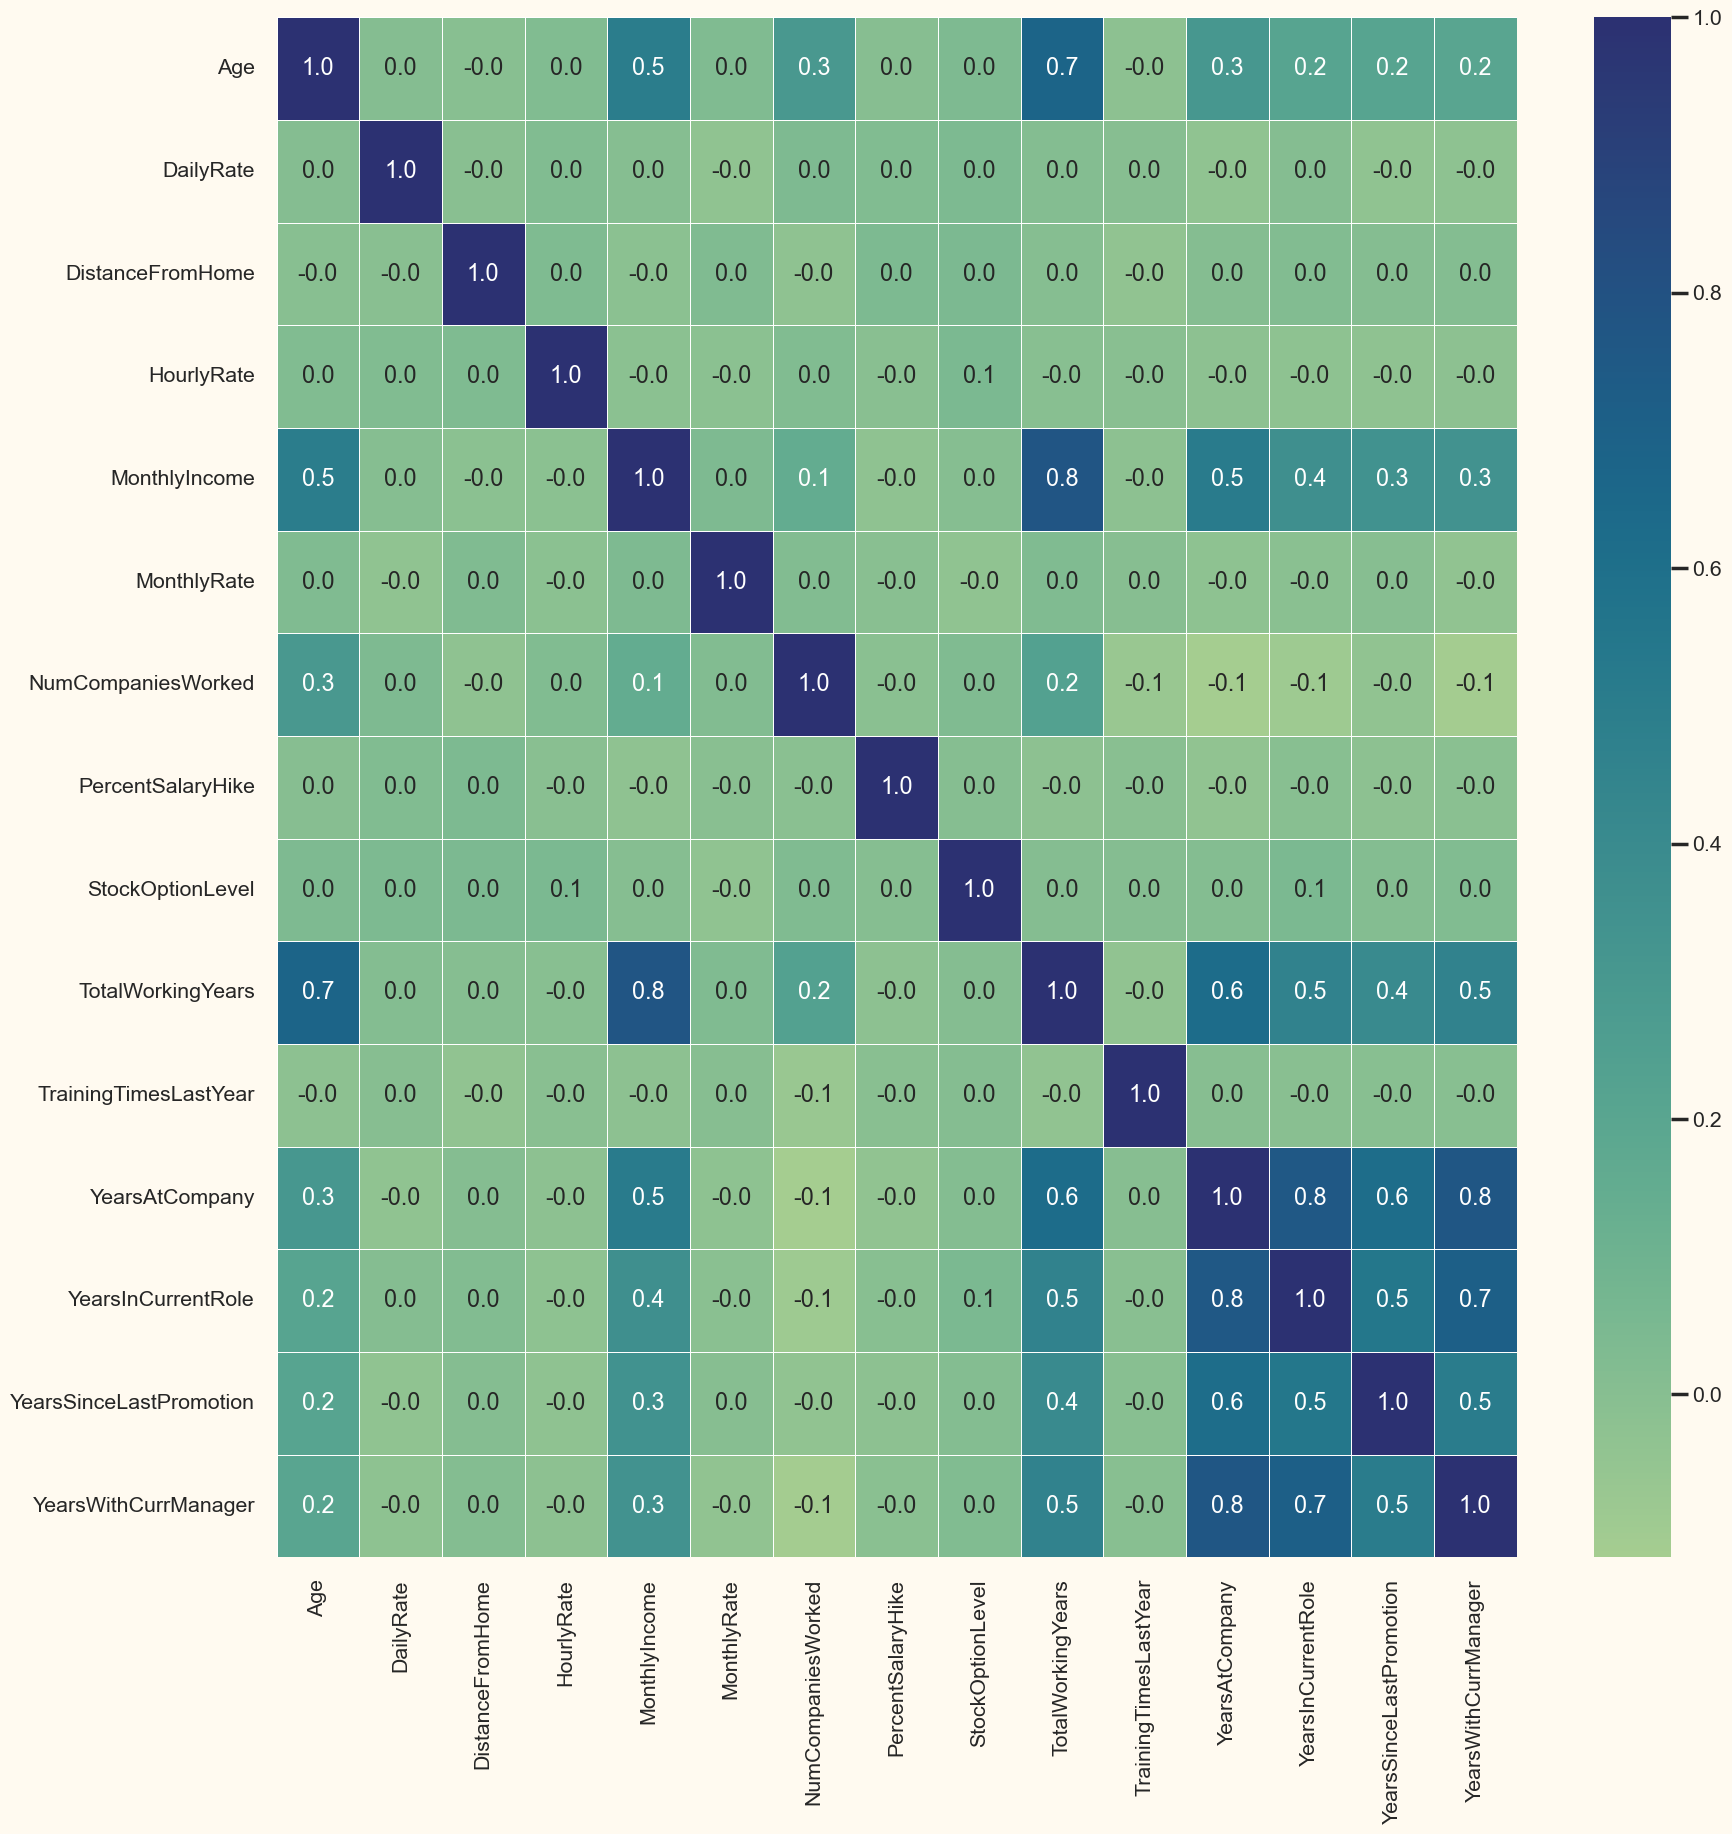

In [15]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f', cmap='crest')
plt.show()

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA PRE-PROCESSING </h2>
</div>

In [51]:
# Convert Target Variable into numerical form. 
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [55]:
from sklearn.utils import resample
#seperate the case of yes attrition and yes-subscribe
emp_attr_no = df[df.Attrition == 0]
emp_attr_yes = df[df.Attrition == 1]
    
#Upsample the yes-subs cases
df_minority_downsampled = resample(emp_attr_yes,replace =True, n_samples = 600)
    
#Combine majority class with upsampled minority class
new_df = pd.concat([emp_attr_no, df_minority_downsampled])

In [18]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very High,Male,...,Excellent,High,0,8,2,Good,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,High,Female,...,Outstanding,Low,3,12,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,36,1,Travel_Rarely,318,Research & Development,9,Bachelor,Medical,Very High,Male,...,Excellent,Low,1,2,0,Good,1,0,0,0
1036,31,1,Travel_Frequently,523,Research & Development,2,Bachelor,Life Sciences,Medium,Male,...,Excellent,High,1,7,2,Bad,2,2,2,2
26,32,1,Travel_Frequently,1125,Research & Development,16,Below College,Life Sciences,Medium,Female,...,Outstanding,Medium,0,10,5,Better,10,2,6,7
800,28,1,Travel_Frequently,1009,Research & Development,1,Bachelor,Medical,Low,Male,...,Excellent,Low,2,1,2,Better,1,0,0,0


In [52]:
# Convert Categorical Variable into numerical form.
num_df = pd.get_dummies(new_df,drop_first=True)
num_df.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1,49,0,279,8,61,5130,24907,1,23,1,...,1,0,0,1,0,0,1,0,1,0
3,33,0,1392,3,56,2909,23159,1,11,0,...,1,0,1,0,0,0,0,0,1,0
4,27,0,591,2,40,3468,16632,9,12,1,...,1,0,0,0,0,0,1,0,1,0
5,32,0,1005,2,79,3068,11864,0,13,0,...,0,1,0,0,0,0,0,0,0,1
6,59,0,1324,3,81,2670,9964,4,20,3,...,1,0,1,1,1,0,0,0,0,1


In [20]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 1 to 1083
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1833 non-null   int64
 1   Attrition                           1833 non-null   int32
 2   DailyRate                           1833 non-null   int64
 3   DistanceFromHome                    1833 non-null   int64
 4   HourlyRate                          1833 non-null   int64
 5   MonthlyIncome                       1833 non-null   int64
 6   MonthlyRate                         1833 non-null   int64
 7   NumCompaniesWorked                  1833 non-null   int64
 8   PercentSalaryHike                   1833 non-null   int64
 9   StockOptionLevel                    1833 non-null   int64
 10  TotalWorkingYears                   1833 non-null   int64
 11  TrainingTimesLastYear               1833 non-null   int64
 12  YearsA

In [21]:
# Independent Variable
X = num_df.drop(['Attrition'],axis=1)

# Dependent Variable
y = num_df['Attrition']

# Standardization
X1 = preprocessing.StandardScaler().fit(X).transform(X)

In [22]:
# Train and Test the data 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

In [23]:
# Size of Training and Testing data
print("Training Data :",X_train.shape)
print("Testing Data :",X_test.shape)

Training Data : (1374, 60)
Testing Data : (459, 60)


In [24]:
# Creating one function to build models

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    
    print("TESTING RESULTS: \n===============================\n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}\n")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}\n")
    print(f"CLASSIFICATION REPORT:\n{clf_report}\n")

## <span style='color:blue'> 1] LOGISTIC REGRESSION </span>


In [25]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
evaluate(lr_clf,X_train,X_test,y_train,y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[278  34]
 [ 35 112]]

ACCURACY SCORE:
0.8497

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.888179    0.767123  0.849673    0.827651      0.849409
recall       0.891026    0.761905  0.849673    0.826465      0.849673
f1-score     0.889600    0.764505  0.849673    0.827053      0.849537
support    312.000000  147.000000  0.849673  459.000000    459.000000



In [27]:
def tune_hyperparameters(model,X1,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
     

In [28]:
hyperparameters = [{"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}]

In [29]:
optimal_parameter_model = GridSearchCV(LogisticRegression(), hyperparameters, cv = 10, scoring = 'roc_auc')

In [30]:
optimal_parameter_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc')

In [31]:
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.8541757006411863
Optimal parameters: {'C': 0.1, 'penalty': 'l2'}


## <span style='color:blue'> 2] k Nearest Neighbour</span>


In [32]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
evaluate(knn_clf,X_train,X_test,y_train,y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[256  56]
 [ 54  93]]

ACCURACY SCORE:
0.7603

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.825806    0.624161  0.760349    0.724984      0.761227
recall       0.820513    0.632653  0.760349    0.726583      0.760349
f1-score     0.823151    0.628378  0.760349    0.725765      0.760773
support    312.000000  147.000000  0.760349  459.000000    459.000000



In [34]:
hyperparameters = [{'n_neighbors': range(5,10),'metric':['canberra','euclidean','minkowski']}]
optimal_parameter_model = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv = 10, scoring = 'roc_auc')
optimal_parameter_model.fit(X_train,y_train)
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.852950041556283
Optimal parameters: {'metric': 'euclidean', 'n_neighbors': 5}


In [35]:
classifier1 = KNeighborsClassifier(n_neighbors =5, metric = 'euclidean')
classifier1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [36]:
y1_pred = classifier1.predict(X_test)
accuracy_score(y_test,y1_pred)

0.7603485838779956

## <span style='color:blue'> 3]Decision Trees</span>

In [37]:
gini_clf=DecisionTreeClassifier(criterion='gini')
gini_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
evaluate(gini_clf,X_train,X_test,y_train,y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[265  47]
 [ 12 135]]

ACCURACY SCORE:
0.8715

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.956679    0.741758   0.87146    0.849218      0.887848
recall       0.849359    0.918367   0.87146    0.883863      0.871460
f1-score     0.899830    0.820669   0.87146    0.860249      0.874478
support    312.000000  147.000000   0.87146  459.000000    459.000000



In [39]:
hyperparameters = [{'criterion':["gini","entropy"],'max_depth': range(3,20), 'min_samples_leaf': range(5,10)}]
optimal_parameter_model = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv = 10, scoring = 'roc_auc')
optimal_parameter_model.fit(X_train,y_train)
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.8929954739787658
Optimal parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 5}


In [40]:
entropy_clf=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=319,min_samples_leaf=5)
entropy_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=319, min_samples_leaf=5,
                       random_state=100)

In [41]:
evaluate(entropy_clf,X_train,X_test,y_train,y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[270  42]
 [ 21 126]]

ACCURACY SCORE:
0.8627

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927835    0.750000  0.862745    0.838918      0.870881
recall       0.865385    0.857143  0.862745    0.861264      0.862745
f1-score     0.895522    0.800000  0.862745    0.847761      0.864930
support    312.000000  147.000000  0.862745  459.000000    459.000000



In [42]:
from sklearn import tree
print(tree.export_text(entropy_clf))

|--- feature_52 <= 0.37
|   |--- feature_0 <= -1.59
|   |   |--- feature_1 <= -0.52
|   |   |   |--- feature_16 <= -0.42
|   |   |   |   |--- class: 1
|   |   |   |--- feature_16 >  -0.42
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.52
|   |   |   |--- feature_1 <= 1.15
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.15
|   |   |   |   |--- class: 1
|   |--- feature_0 >  -1.59
|   |   |--- feature_4 <= 1.00
|   |   |   |--- feature_47 <= 0.69
|   |   |   |   |--- feature_4 <= 0.25
|   |   |   |   |   |--- feature_12 <= 0.16
|   |   |   |   |   |   |--- feature_15 <= 0.69
|   |   |   |   |   |   |   |--- feature_54 <= 0.75
|   |   |   |   |   |   |   |   |--- feature_8 <= -0.29
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.41
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.94
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -0.94
|   |   |   |   |   |   |   |   |   |   

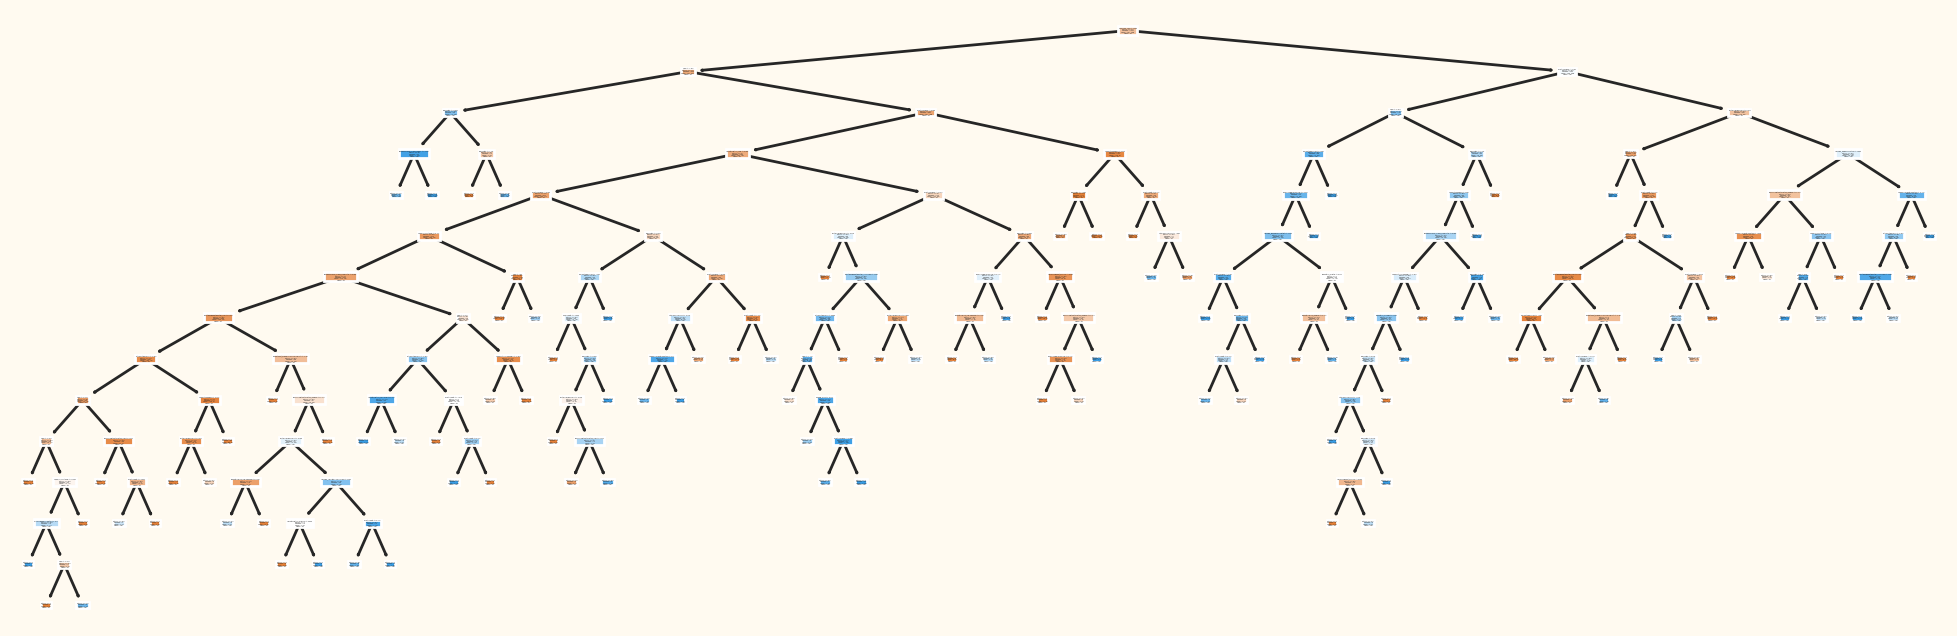

In [43]:
fig=plt.figure(figsize=(25,8))
tree.plot_tree(entropy_clf,feature_names= list(X.columns),class_names=['no','yes'],filled=True)
plt.show()

## <span style='color:blue'> 4] Random Forest</span>

In [44]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[309   3]
 [ 14 133]]

ACCURACY SCORE:
0.9630

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.956656    0.977941  0.962963    0.967299      0.963473
recall       0.990385    0.904762  0.962963    0.947573      0.962963
f1-score     0.973228    0.939929  0.962963    0.956579      0.962564
support    312.000000  147.000000  0.962963  459.000000    459.000000



In [46]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf1_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

print("Best Score: ", search.best_score_)
print("Optimal parameters:", search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Score:  0.9583223457571284
Optimal parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [47]:
rf1_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf1_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 

CONFUSION MATRIX:
[[309   3]
 [ 14 133]]

ACCURACY SCORE:
0.9630

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.956656    0.977941  0.962963    0.967299      0.963473
recall       0.990385    0.904762  0.962963    0.947573      0.962963
f1-score     0.973228    0.939929  0.962963    0.956579      0.962564
support    312.000000  147.000000  0.962963  459.000000    459.000000



<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Comparing all the models using ROC</h2>
</div>

In [48]:
ml_models = {
    'Logistic Regression': lr_clf,
    'k Nearest Neighbour': knn_clf,
    'Decision Trees':entropy_clf,
    'Random Forest': rf_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION            roc_auc_score: 0.826
K NEAREST NEIGHBOUR            roc_auc_score: 0.727
DECISION TREES                 roc_auc_score: 0.861
RANDOM FOREST                  roc_auc_score: 0.948


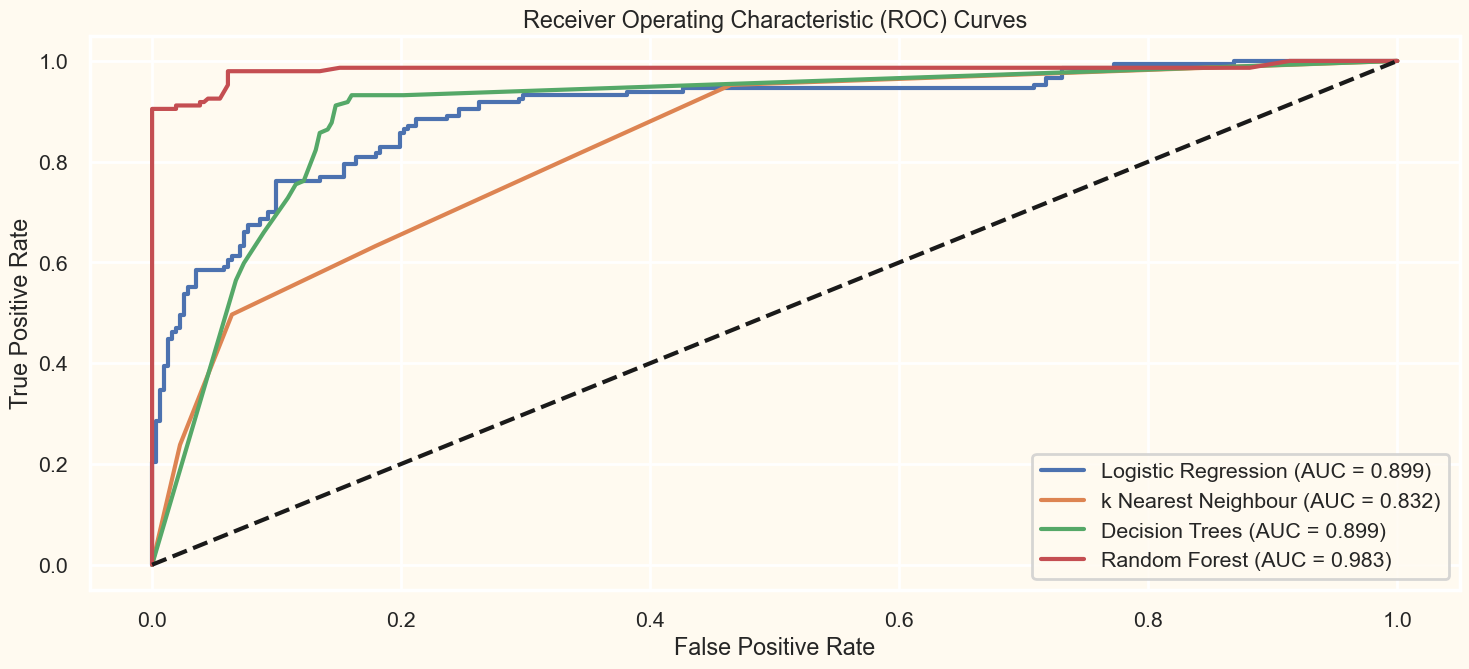

In [66]:
plt.subplots(figsize=(15,7))
# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()